### 1. Knihovny a moduly pro matematické výpočty

#### Zadání:
V tomto kurzu jste se učili s některými vybranými knihovnami. Některé sloužily pro rychlé vektorové operace, jako numpy, některé mají naprogramovány symbolické manipulace, které lze převést na numerické reprezentace (sympy), některé mají v sobě funkce pro numerickou integraci (scipy). Některé slouží i pro rychlé základní operace s čísly (numba).

Vaším úkolem je změřit potřebný čas pro vyřešení nějakého problému (např.: provést skalární součin, vypočítat určitý integrál) pomocí standardního pythonu a pomocí specializované knihovny. Toto měření proveďte alespoň pro 5 různých úloh (ne pouze jiná čísla, ale úplně jiné téma) a minimálně porovnejte rychlost jednoho modulu se standardním pythonem. Ideálně proveďte porovnání ještě s dalším modulem a snažte se, ať je kód ve standardním pythonu napsán efektivně.

#### Vypracované řešení
1. Porovnání dob provádění skalárního součinu
2. Porovnání dob provádění výpočtu derivace
3. Porovnání dob provádění maticového součinu
4. Porovnání dob výpočtu faktoriálu
5. Porovnání dob výpočtu statistických funkcí

In [2]:
import numpy as np
from timeit import timeit
import matplotlib.pyplot as plt
from typing import Any
import math
from sympy import symbols, diff, sin, cos

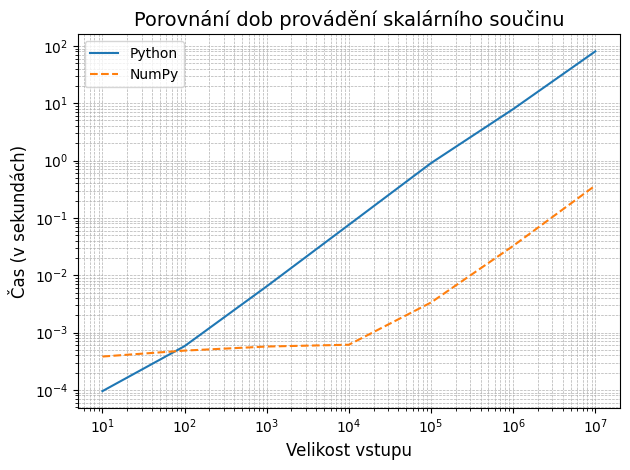

In [35]:
def scalar_product(a, b):
    return sum(x * y for x, y in zip(a, b))


def scalar_product_numpy(a, b):
    return np.dot(a, b)


repeat = 100
x_values = [10, 100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]

times = []
times_numpy = []

for x in x_values:
    size_list = list(range(x))

    A = list(size_list)
    B = list(size_list)
    time = timeit(lambda: scalar_product(A, B), number=repeat)
    times.append(time)

    A = np.array(list(size_list))
    B = np.array(list(size_list))
    time = timeit(lambda: scalar_product_numpy(A, B), number=repeat)
    times_numpy.append(time)

plt.plot(x_values, times, label="Python", linestyle="-")
plt.plot(x_values, times_numpy, label="NumPy", linestyle="--")

plt.title("Porovnání dob provádění skalárního součinu", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel("Velikost vstupu", fontsize=12)
plt.ylabel("Čas (v sekundách)", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

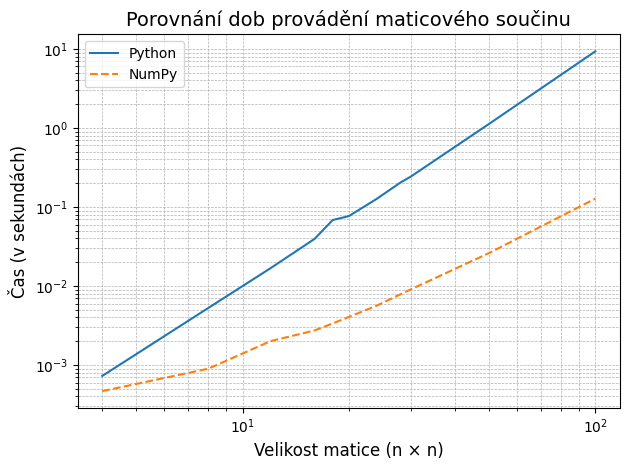

In [58]:
def derivation(A: list[list[Any]], B: list[list[Any]]):
    result = []

    rows_A = len(A)
    cols_A = len(A[0])
    cols_B = len(B[0])

    for _ in range(rows_A):
        row = [0] * cols_B
        result.append(row)

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]

    return result


def matrix_multiply_numpy(A: list[list[Any]], B: list[list[Any]]):
    return np.matmul(A, B)


repeat = 100
x_values = [4, 8, 12, 16, 18, 20, 24, 28, 30, 50, 100]

times = []
times_numpy = []

for x in x_values:
    A = [[i * x + j for j in range(x)] for i in range(x)]
    B = [[i * x + j for j in range(x)] for i in range(x)]

    time = timeit(lambda: derivation(A, B), number=repeat)
    times.append(time)

    time = timeit(
        lambda: matrix_multiply_numpy(np.array(A), np.array(B)), number=repeat
    )
    times_numpy.append(time)

plt.plot(x_values, times, label="Python", linestyle="-")
plt.plot(x_values, times_numpy, label="NumPy", linestyle="--")

plt.title("Porovnání dob provádění maticového součinu", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel("Velikost matice (n × n)", fontsize=12)
plt.ylabel("Čas (v sekundách)", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
def derivation(x: float, h: float) -> float:
    # https://www.cuemath.com/calculus/f-x-plus-h-minus-f-x-h/
    f = lambda x: math.sin(x) * math.cos(x)
    return (f(x + h) - f(x - h)) / (2 * h)


def derivation_sympy(x: float) -> float:
    x_sym = symbols("x")
    f_sym = sin(x_sym) * cos(x_sym)
    derivation = diff(f_sym, x_sym)
    return derivation.evalf(subs={x_sym: x})


repeat = 1
x = 0.5
h = 0.0001

time = timeit(lambda: derivation(x, h), number=repeat)
time_sympy = timeit(lambda: derivation_sympy(x), number=repeat)

print(f"Python zderivoval x={x} za: {time} sekund.")
print(f"SymPy zderivovalo x={x} za: {time_sympy} sekund.")

Python zderivoval x=0.5 za: 5.49999822396785e-06 sekund.
SymPy zderivovalo x=0.5 za: 0.00047170000107144006 sekund.


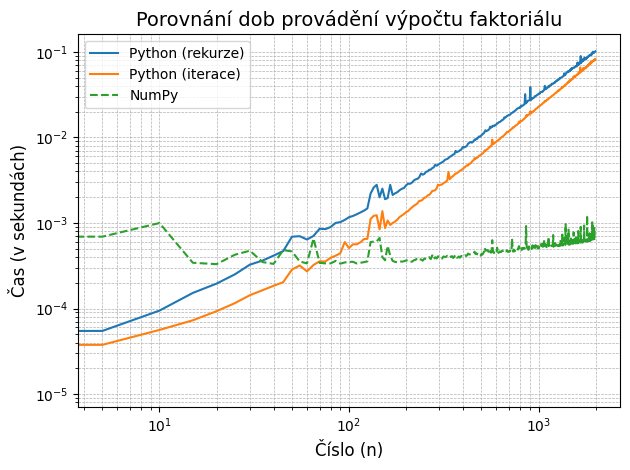

In [6]:
def factorial(n: int):
    return 1 if (n < 1) else n * factorial(n - 1)


def factorial_iterative(n: int):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result


def factorial_numpy(n: int):
    return np.prod(np.arange(1, n + 1))


repeat = 100
numbers = list(range(0, 2000, 5))

times_recursion = []
times_iterative = []
times_numpy = []

for number in numbers:
    time = timeit(lambda: factorial(number), number=repeat)
    times_recursion.append(time)

    time = timeit(lambda: factorial_iterative(number), number=repeat)
    times_iterative.append(time)

    time = timeit(lambda: factorial_numpy(number), number=repeat)
    times_numpy.append(time)

plt.plot(numbers, times_recursion, label="Python (rekurze)", linestyle="-")
plt.plot(numbers, times_iterative, label="Python (iterace)", linestyle="-")
plt.plot(numbers, times_numpy, label="NumPy", linestyle="--")

plt.title("Porovnání dob provádění výpočtu faktoriálu", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel("Číslo (n)", fontsize=12)
plt.ylabel("Čas (v sekundách)", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

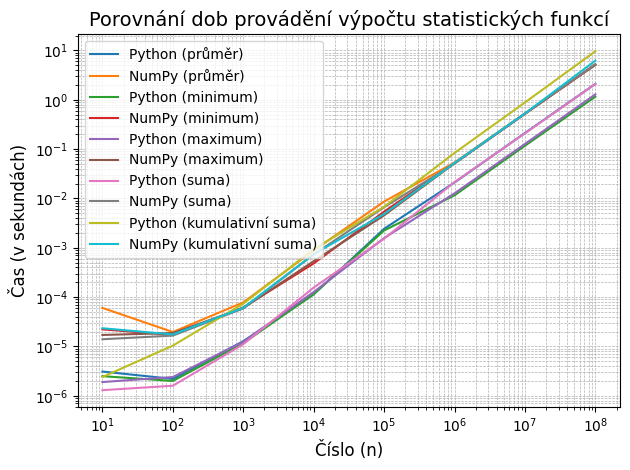

In [4]:
def mean_standard(values):
    return sum(values) / len(values)


def mean_numpy(values):
    return np.sum(values) / len(values)


def min_standard(values):
    return min(values)


def min_numpy(values):
    return np.min(values)


def max_standard(values):
    return max(values)


def max_numpy(values):
    return np.max(values)


def sum_standard(values):
    return sum(values)


def sum_numpy(values):
    return np.sum(values)


def cumsum_standard(values):
    cumsum = []
    running_sum = 0
    for value in values:
        running_sum += value
        cumsum.append(running_sum)
    return cumsum


def cumsum_numpy(values):
    return np.cumsum(values)


repeat = 1
numbers = [
    10,
    100,
    1_000,
    10_000,
    100_000,
    1_000_000,
    10_000_000,
    100_000_000,
]

times_mean = []
times_mean_numpy = []

times_min = []
times_min_numpy = []

times_max = []
times_max_numpy = []

times_sum = []
times_sum_numpy = []

times_cumsum = []
times_cumsum_numpy = []

for number in numbers:
    time = timeit(lambda: mean_standard(range(0, number)), number=repeat)
    times_mean.append(time)
    time = timeit(lambda: mean_numpy(range(0, number)), number=repeat)
    times_mean_numpy.append(time)

    time = timeit(lambda: min_standard(range(0, number)), number=repeat)
    times_min.append(time)
    time = timeit(lambda: min_numpy(range(0, number)), number=repeat)
    times_min_numpy.append(time)

    time = timeit(lambda: max_standard(range(0, number)), number=repeat)
    times_max.append(time)
    time = timeit(lambda: max_numpy(range(0, number)), number=repeat)
    times_max_numpy.append(time)

    time = timeit(lambda: sum_standard(range(0, number)), number=repeat)
    times_sum.append(time)
    time = timeit(lambda: sum_numpy(range(0, number)), number=repeat)
    times_sum_numpy.append(time)

    time = timeit(lambda: cumsum_standard(range(0, number)), number=repeat)
    times_cumsum.append(time)
    time = timeit(lambda: cumsum_numpy(range(0, number)), number=repeat)
    times_cumsum_numpy.append(time)

plt.plot(numbers, times_mean, label="Python (průměr)", linestyle="-")
plt.plot(numbers, times_mean_numpy, label="NumPy (průměr)", linestyle="-")

plt.plot(numbers, times_min, label="Python (minimum)", linestyle="-")
plt.plot(numbers, times_min_numpy, label="NumPy (minimum)", linestyle="-")

plt.plot(numbers, times_max, label="Python (maximum)", linestyle="-")
plt.plot(numbers, times_max_numpy, label="NumPy (maximum)", linestyle="-")

plt.plot(numbers, times_sum, label="Python (suma)", linestyle="-")
plt.plot(numbers, times_sum_numpy, label="NumPy (suma)", linestyle="-")

plt.plot(numbers, times_cumsum, label="Python (kumulativní suma)", linestyle="-")
plt.plot(numbers, times_cumsum_numpy, label="NumPy (kumulativní suma)", linestyle="-")

plt.title("Porovnání dob provádění výpočtu statistických funkcí", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel("Číslo (n)", fontsize=12)
plt.ylabel("Čas (v sekundách)", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

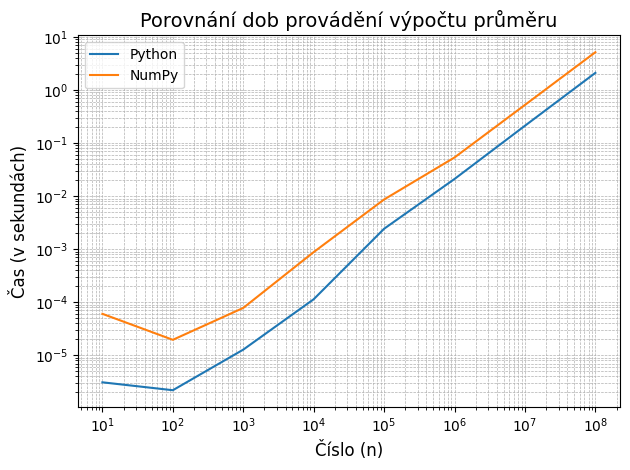

In [10]:
plt.plot(numbers, times_mean, label="Python", linestyle="-")
plt.plot(numbers, times_mean_numpy, label="NumPy", linestyle="-")

plt.title("Porovnání dob provádění výpočtu průměru", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel("Číslo (n)", fontsize=12)
plt.ylabel("Čas (v sekundách)", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

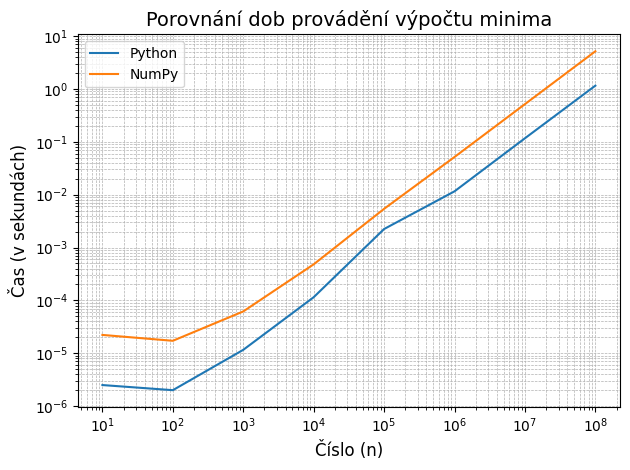

In [6]:
plt.plot(numbers, times_min, label="Python", linestyle="-")
plt.plot(numbers, times_min_numpy, label="NumPy", linestyle="-")

plt.title("Porovnání dob provádění výpočtu minima", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel("Číslo (n)", fontsize=12)
plt.ylabel("Čas (v sekundách)", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

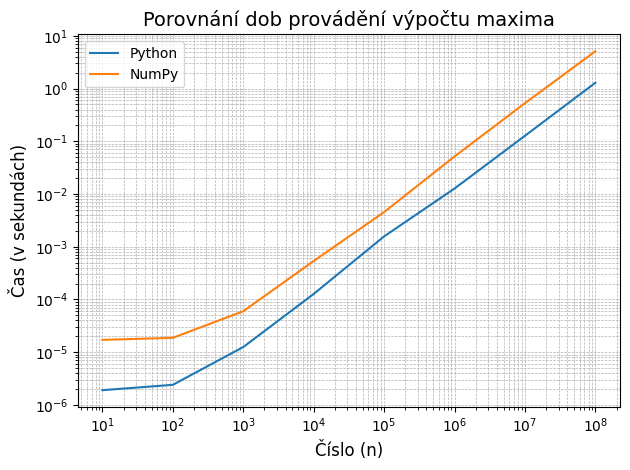

In [7]:
plt.plot(numbers, times_max, label="Python", linestyle="-")
plt.plot(numbers, times_max_numpy, label="NumPy", linestyle="-")

plt.title("Porovnání dob provádění výpočtu maxima", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel("Číslo (n)", fontsize=12)
plt.ylabel("Čas (v sekundách)", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

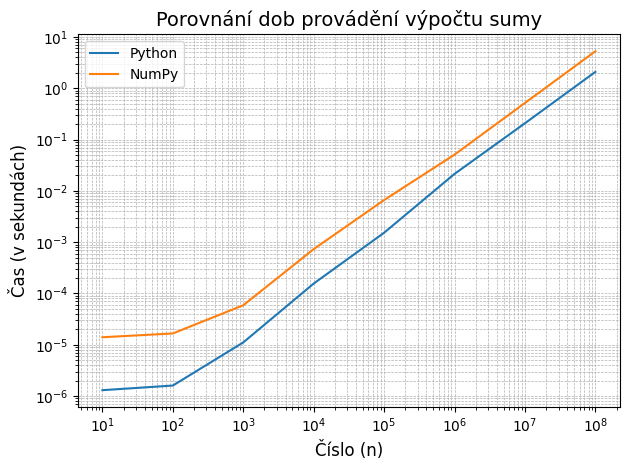

In [8]:
plt.plot(numbers, times_sum, label="Python", linestyle="-")
plt.plot(numbers, times_sum_numpy, label="NumPy", linestyle="-")

plt.title("Porovnání dob provádění výpočtu sumy", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel("Číslo (n)", fontsize=12)
plt.ylabel("Čas (v sekundách)", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

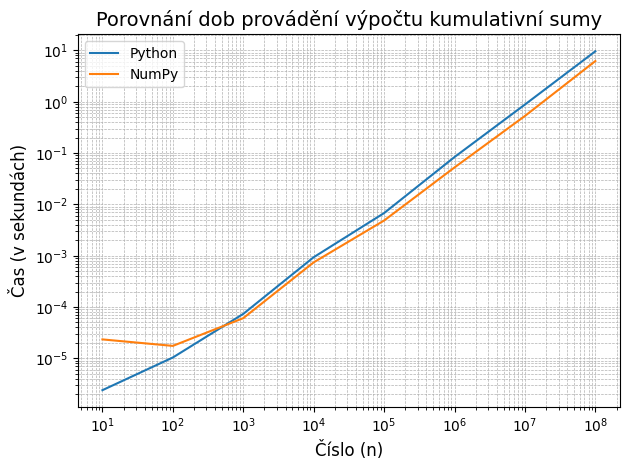

In [9]:
plt.plot(numbers, times_cumsum, label="Python", linestyle="-")
plt.plot(numbers, times_cumsum_numpy, label="NumPy", linestyle="-")

plt.title("Porovnání dob provádění výpočtu kumulativní sumy", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlabel("Číslo (n)", fontsize=12)
plt.ylabel("Čas (v sekundách)", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()